In [1]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
from matplotlib.colors import LogNorm
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import healpy as hp
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


In [2]:
def rotate_map(hmap, rot_theta, rot_phi):
    """
    Take hmap (a healpix map array) and return another healpix map array 
    which is ordered such that it has been rotated in (theta, phi) by the 
    amounts given.
    """
    nside = hp.npix2nside(len(hmap))

    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_phi,rot_theta])

    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)

    # Interpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot, prot)

    return rot_map

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


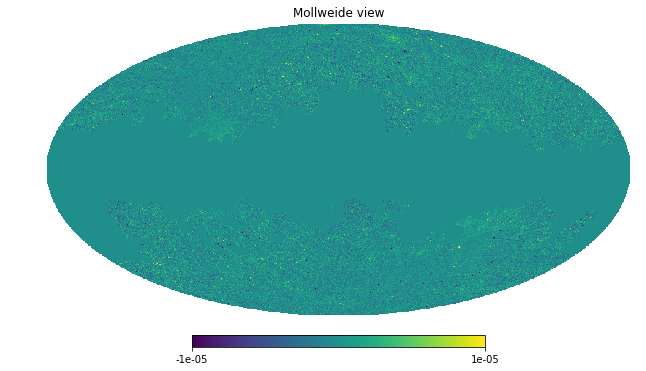

In [3]:
sz_map = hp.read_map('COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits', nest=False)
sz_map_mask = hp.read_map('COM_Mask_Compton-SZMap_2048_R2.00.fits', nest=False)
hp.mollview(sz_map*sz_map_mask, min=-1e-5, max=1e-5)

In [14]:
ra_c = 30.0
dec_c = 0.0
nside = 2048

# define grid to work on
healpix_grid = np.arange(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, healpix_grid)
ra = phi/np.pi*180
dec = 90.0 - (theta/np.pi*180)

c1 = SkyCoord(ra_c*u.degree, dec_c*u.degree, frame='icrs')
c2 = SkyCoord(ra*u.degree, dec*u.degree, frame='icrs')
sep = c1.separation(c2)
mask_area = (sep.degree<3)
mask_area2 = (sep.degree<5)

In [15]:
hpix = healpix_grid[mask_area2]

0
good


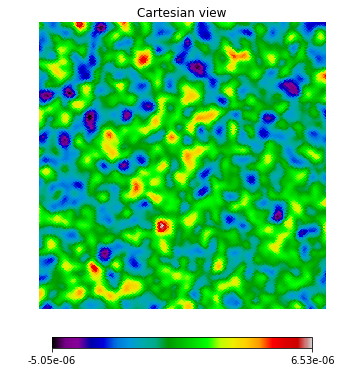

1
2
good


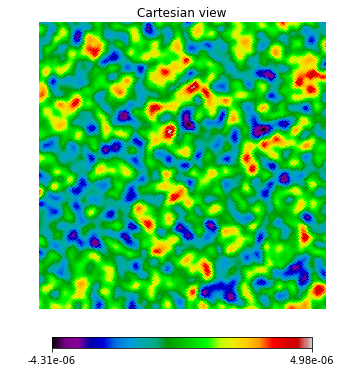

3
4
5


In [ ]:
n = 0
for i in range(100):
    print(i)
    rot_theta = 2*np.pi*np.random.random() - np.pi
    rot_phi = 2*np.pi*np.random.random()
    if np.abs(rot_theta)>np.pi/6:
        rot = rotate_map(sz_map*sz_map_mask, rot_theta, rot_phi)
        if (len(rot[mask_area][rot[mask_area]==0])<10):
            print('good')
            hp.cartview(rot, lonra=[28,32], latra=[-2,2],cmap='nipy_spectral')
            mplot.show()
            
            noise_masked = rot[hpix]

            np.savez('noise_map_'+str(n)+'.npz', hpix=hpix, noise=noise_masked)
            n+=1
    else:
        continue